# Modélisation Maganza

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
### Définition des paramètres

rho = 1.292
c = 340   #m/s
L = 40e-2 #m
T = 2*L/c 
f = 1/T  #il faudra suréchantillonner ? temps très court....

Z0 = rho*c
eps = 0.05

t_max = 1  #s
compute_time = np.arange(int(t_max/T))*int(t_max/T)

La section $S$ ne rentre pas en compte ? 

Ou alors dans les expressions de A,B et C de même que la pression de bouche $p_m$ et la pression de plaquage $p_M$.

In [8]:
### Définition des fonctions 

def F(p,A,B,C):
    "Relation de couplage : u = F(p)"
    return A*p+B*p**2+C*p**3

def Fhat(x,A,B,C):
    return -F(x,A,B,C)

def Fcal(x,A,B,C,eps,Z0):
    return Fhat(x,A,B,C)*(Z0-eps)/(Z0+eps)

Si $x=0$ la fonction $F$ renvoit 0... et donc à l'itération suivante le signal reste nul? 

<ipython-input-8-3967a7c17234>:5: RuntimeWarning: overflow encountered in double_scalars
  return A*p+B*p**2+C*p**3
<ipython-input-16-63135a6e29ec>:15: RuntimeWarning: invalid value encountered in add
  p = (Xmoins+Xplus)*2**(-1/2)


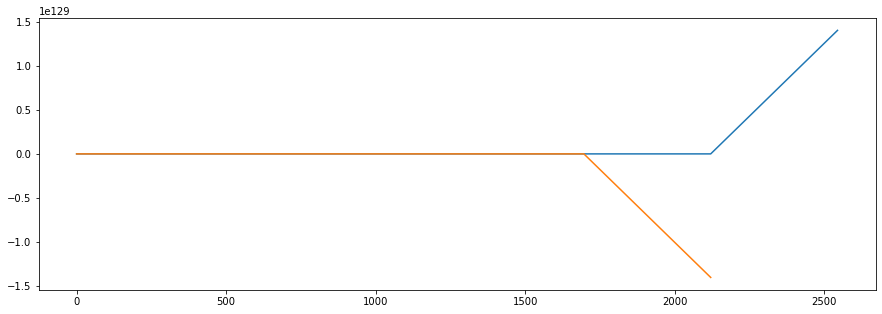

In [16]:
### Initialisation
N = len(compute_time)
Xmoins = np.zeros(N)
Xplus = np.zeros(N)

A,B,C = 1,1,1

Xmoins[0] = 1 #? dirac? 
Xplus[0] = Fhat(Xmoins[0],A,B,C)

for i in range(1,N):
    Xmoins[i] = -Fcal(Xmoins[i-1],A,B,C,eps,Z0)
    Xplus[i] = Fhat(Xmoins[i],A,B,C)
    
p = (Xmoins+Xplus)/np.sqrt(2)
f = (Xmoins-Xplus)/np.sqrt(2)/Z0

plt.figure(figsize=(15,5))
plt.plot(compute_time,Xmoins)
plt.plot(compute_time,Xplus)
plt.grid()